In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import r2_score

In [2]:
df = yf.download('GOOGL', start='2012-01-01', end='2023-05-16')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.339840,16.720470,16.325577,16.651901,16.651901,146912940
2012-01-04,16.642391,16.773024,16.532032,16.723724,16.723724,114445440
2012-01-05,16.569820,16.615866,16.422173,16.491741,16.491741,131184684
2012-01-06,16.495245,16.516518,16.261011,16.266768,16.266768,107608284
2012-01-09,16.178679,16.191191,15.546296,15.577077,15.577077,232671096
...,...,...,...,...,...,...
2023-05-09,108.389999,110.150002,107.190002,107.349998,107.349998,36360100
2023-05-10,107.970001,112.940002,107.930000,111.750000,111.750000,63153400
2023-05-11,115.400002,117.919998,114.410004,116.570000,116.570000,78900000


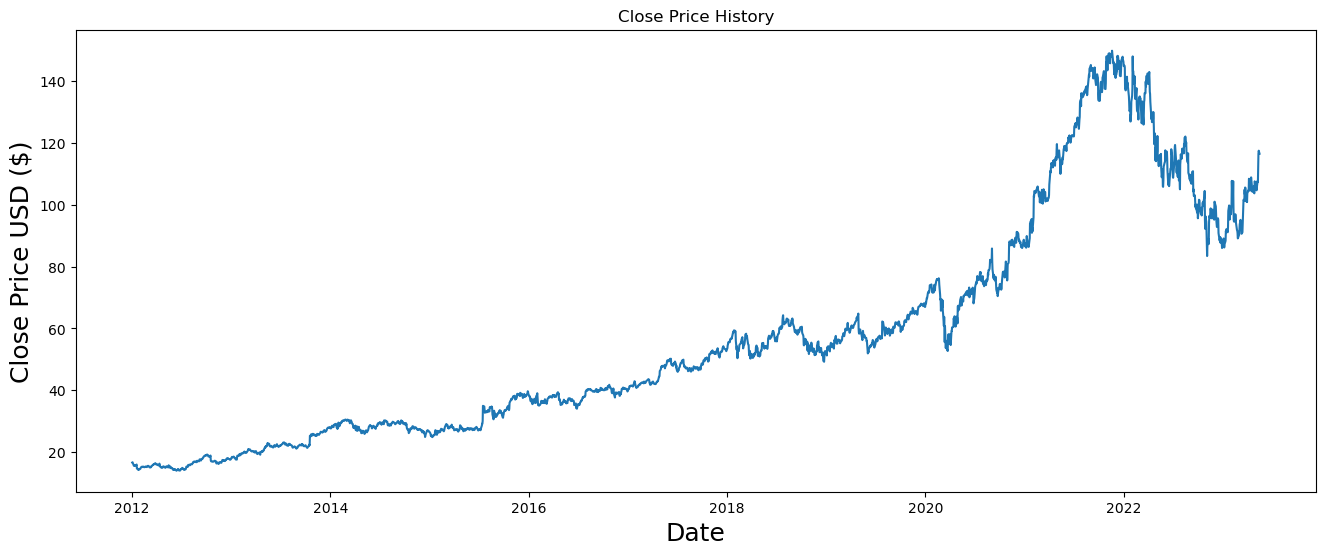

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2717

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0195929 ],
       [0.0201216 ],
       [0.01841394],
       ...,
       [0.75510543],
       [0.76202493],
       [0.75466378]])

In [6]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.0195929 , 0.0201216 , 0.01841394, 0.01675787, 0.01168095,
       0.01180622, 0.0123257 , 0.0130036 , 0.01214701, 0.01280834,
       0.01360598, 0.01483283, 0.0049627 , 0.00487612, 0.00403059,
       0.00192319, 0.00166713, 0.00385558, 0.00343373, 0.00387953,
       0.00401216, 0.00480059, 0.00686746, 0.00921802, 0.00879065,
       0.00935803, 0.00965461, 0.00863223, 0.00979092, 0.00934145,
       0.00856775, 0.00874459, 0.00839828, 0.01012251, 0.00900618,
       0.00866907, 0.00936724, 0.00925855, 0.01093121, 0.01090541,
       0.0116699 , 0.01145805, 0.01016857, 0.00845722, 0.00879618,
       0.00885881, 0.00758958, 0.00849223, 0.01081883, 0.01048909,
       0.01143595, 0.01215622, 0.01380308, 0.01371282, 0.01490837,
       0.01602654, 0.01538917, 0.01663075, 0.01620523, 0.01781524])]
[0.01646128229973394]

[array([0.0195929 , 0.0201216 , 0.01841394, 0.01675787, 0.01168095,
       0.01180622, 0.0123257 , 0.0130036 , 0.01214701, 0.01280834,
       0.01360598, 0.01483283, 0.00

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2657/2657 [==============================] - 27s 10ms/step - loss: 0.0014


In [11]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 13ms/step


5.4408538053976185

/var/folders/_3/54zb8k594ss9zttpfm2zftcc0000gn/T/ipykernel_18749/78484477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


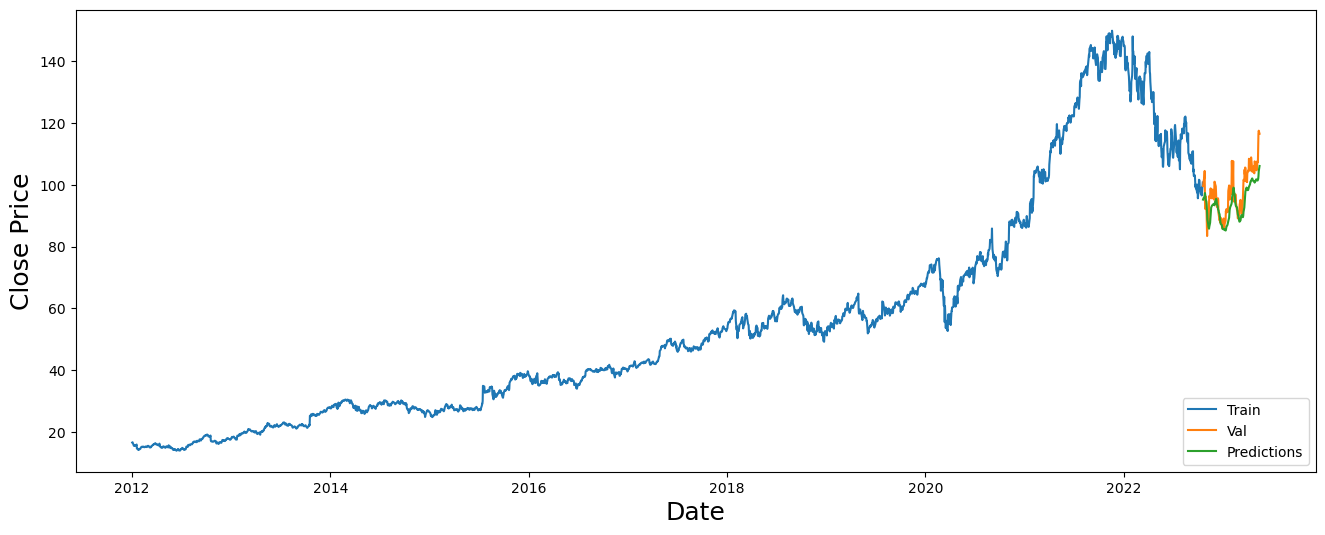

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [13]:
valid

,Close,Predictions
Date,,
2022-10-19,99.629997,95.214233
2022-10-20,99.970001,95.479744
2022-10-21,101.129997,95.713104
2022-10-24,102.519997,96.050034
2022-10-25,104.480003,96.561630
...,...,...
2023-05-09,107.349998,101.612061
2023-05-10,111.750000,101.892159
2023-05-11,116.570000,102.736954


In [35]:
r2_score(valid['Close'],valid['Predictions'])

0.6808760821469912